In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
#from datetime import datetime as dt
#import datetime as dt

datapath = '/Users/ajiaco/Data/Politics/'

## Explore the various datasets

### Data set 0: President and political party by year

In [2]:
filename = "Presidents_Party.csv"  # From: https://www.kaggle.com/datasets/zsinghrahulk/us-presidents-age-state-health-and-wealth

data0 = pd.read_csv(datapath+filename)
data0.head()

,Year,President,President Party
0,1929,Herbert Hoover,Republican
1,1930,Herbert Hoover,Republican
2,1931,Herbert Hoover,Republican
3,1932,Herbert Hoover,Republican
4,1933,Franklin D. Roosevelt,Democratic


### Utility functions:

In [3]:
def prepFREDdata(data,year_min):
    data['Datetime'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
    data['Year'] = data['Datetime'].dt.strftime('%Y').astype(int)
    data_new = data.loc[data['Year']>year_min]
    del data_new['DATE'], data_new['Datetime']
    
    return data_new

In [4]:
def yearlyDiffandBarPlots(data,var,cat,y_unit):
    plt.figure(figsize = (12, 4))
    ax = sns.barplot(x = data.index ,y = data[var],hue = data[cat])
    #ax.set_xticks(range(0,len(data),4), labels=range(1960, 2024,4));
    #ax.set_xticks(range(0,len(data),4), labels=range(1972, 2024,4));
    ax.set_xticks(range(0,len(data),4), labels=range(min(data['Year']), 2024,4));
    ax.set_ylabel(var + y_unit)
    ax.set_xlabel('Year')
    plt.grid(visible = True, axis='both')
    plt.show()

    #data_new = data1[['President', 'President Political Party',data1.columns[-1]]].copy()
    data_delta = data.copy()
    data_delta[var + ' delta'] = data[var].copy().diff()
    
    plt.figure(figsize = (12, 4))
    ax2 = sns.barplot(x = data.index ,y = data_delta[var + ' delta'], hue = data[cat])
    #ax.set_xticks(range(0,len(data),4), labels=range(1960, 2024,4));
    #ax2.set_xticks(range(0,len(data),4), labels=range(1972, 2024,4));
    ax2.set_xticks(range(0,len(data),4), labels=range(min(data['Year']), 2024,4));
    ax2.set_ylabel(var + ' year delta' + y_unit)
    ax2.set_xlabel('Year')
    plt.grid(visible = True, axis='both')
    plt.show()
    
    return data_delta

In [5]:
def aggregateByPresParty(data):
    data_grp = data.groupby('President',as_index=False).agg({data.columns[-1]: ['sum'], 'President Party': pd.Series.mode})
    data_grp.columns = list(['President',data.columns[-1] + ' Net', 'President Party'])

    print(data_grp.sort_values(by=[data.columns[-1]+' Net'], ascending = False))
    
    byParty=data_grp.groupby('President Party')[data.columns[-1] + ' Net'].sum()
    
    print('\n Overal Contribution to {} by President Party since {}:\n'.format(data.columns[-2],min(data['Year'])))
    print(byParty.to_string())

In [118]:
def makeBarPlotbyCat(data,var,cat,y_unit):
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(x=data.index ,y=data[var],hue = data[cat])
    #ax.set_xticks(range(0,len(data),4), labels=range(1960, 2024,4));
    ax.set_xticks(range(0,len(data),4), labels=range(1972, 2024,4));
    ax.set_ylabel(var+y_unit)
    plt.grid(visible = True, axis='both')
    plt.show()

### Data set 1: Federal Deficit (as % of GDP and Presidential Party, by year)

In [6]:
filename = "FRED_FYFSGDA188SPres.csv" # From FRED

data = pd.read_csv(datapath+filename)
data.head()

,Year,SurplusDeficit,President,President Political Party
0,1929,0.70202,Herbert Hoover,Republican
1,1930,0.80078,Herbert Hoover,Republican
2,1931,-0.59697,Herbert Hoover,Republican
3,1932,-4.59494,Herbert Hoover,Republican
4,1933,-4.55261,Franklin D. Roosevelt,Democratic


In [16]:
# Trim dataset to roughly living generations

#data1 = data.loc[data['Year']>1960]
data1 = data.loc[data['Year']>1971]
data1.head()

,Personal Savings Rate,Year
24,11.1,1961
25,11.1,1961
26,10.4,1961
27,10.6,1961
28,10.8,1961


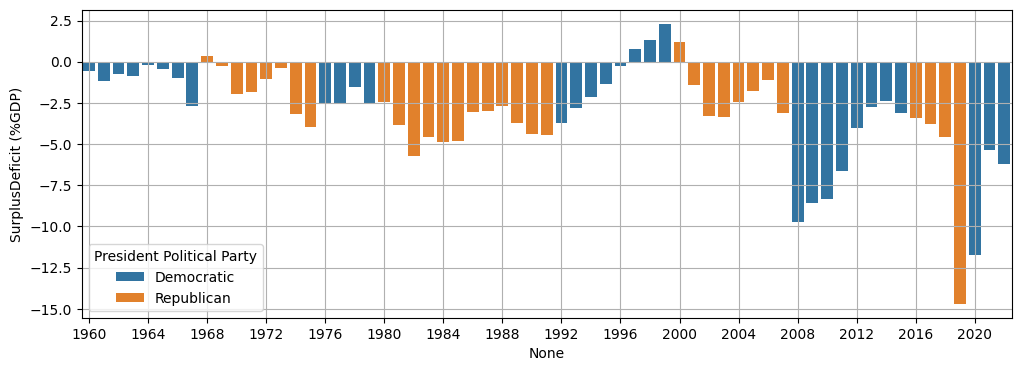

In [67]:
makeBarPlotbyCat(data1,'SurplusDeficit','President Political Party',' (%GDP)')

###  Data set 2: Federal Deficit (in $USD Millions, by year)

In [5]:
filename = "FRED_FYFSD.csv"                  # Federal Deficit (in $USD Millions by year)

data = pd.read_csv(datapath+filename)
data.tail()

,DATE,FYFSD
118,2019-09-30,-983588.0
119,2020-09-30,-3132456.0
120,2021-09-30,-2775350.0
121,2022-09-30,-1375920.0
122,2023-09-30,-1693725.0


In [6]:
#data.rename(columns={"A": "a", "B": "c"})
data.rename(columns={"FYFSD": "Federal Deficit"}, inplace=True)
data['Datetime'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
data['Year'] = data['Datetime'].dt.strftime('%Y').astype(int)
data2 = data.loc[data['Year']>1960]
del data2['DATE'], data2['Datetime']
data2.head()

,Federal Deficit,Year
60,-3335.0,1961
61,-7146.0,1962
62,-4756.0,1963
63,-5915.0,1964
64,-1411.0,1965


In [7]:
# Add the new Deficit data to the original 

data1 = data1.join(data2.set_index('Year'), on='Year')
data1.tail()

,Year,SurplusDeficit,President,President Political Party,Federal Deficit
90,2019,-4.57028,Donald Trump,Republican,-983588.0
91,2020,-14.69054,Donald Trump,Republican,-3132456.0
92,2021,-11.76293,Joe Biden,Democratic,-2775350.0
93,2022,-5.34460,Joe Biden,Democratic,-1375920.0
94,2023,-6.19030,Joe Biden,Democratic,-1693725.0


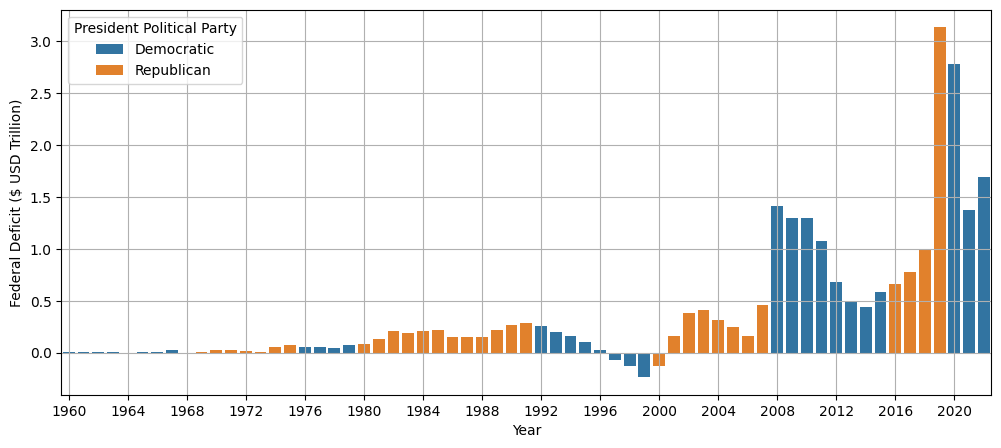

In [8]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(x = data1['Year'],y = -data1['Federal Deficit']/1e6, hue = data1['President Political Party'])

ax.set_xticks(range(0,len(data1),4), labels=range(1960, 2024,4));
ax.set_ylabel('Federal Deficit ($ USD Trillion)')
plt.grid(visible = True, axis='both')
plt.show()

###  Data set 3: Gross Domestic Product, GDP (in $ USD Billions, by quarter)

In [9]:
filename = "FRED_GDP.csv"        # GDP in $ USD Billions 

data = pd.read_csv(datapath+filename)
data.tail()

,DATE,GDP
305,2023-04-01,27063.012
306,2023-07-01,27610.128
307,2023-10-01,27956.998
308,2024-01-01,28269.174
309,2024-04-01,28629.153


In [10]:
data['Datetime'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
data['Year'] = data['Datetime'].dt.strftime('%Y').astype(int)

#data3 = data.loc[data['Year']>1960].groupby('Year').max()
data3 = data.loc[data['Year']>1960].groupby('Year').mean(numeric_only=True)
#del data3['DATE'], data3['Datetime']
data3.head()

,GDP
Year,
1961,562.20975
1962,603.92150
1963,637.45150
1964,684.46150
1965,742.29025


In [11]:
# Add the new GDP data to the original 

data1 = data1.join(data3, on='Year')
data1.tail()

,Year,SurplusDeficit,President,President Political Party,Federal Deficit,GDP
90,2019,-4.57028,Donald Trump,Republican,-983588.0,21521.39500
91,2020,-14.69054,Donald Trump,Republican,-3132456.0,21322.94950
92,2021,-11.76293,Joe Biden,Democratic,-2775350.0,23594.03075
93,2022,-5.34460,Joe Biden,Democratic,-1375920.0,25744.10825
94,2023,-6.19030,Joe Biden,Democratic,-1693725.0,27360.93475


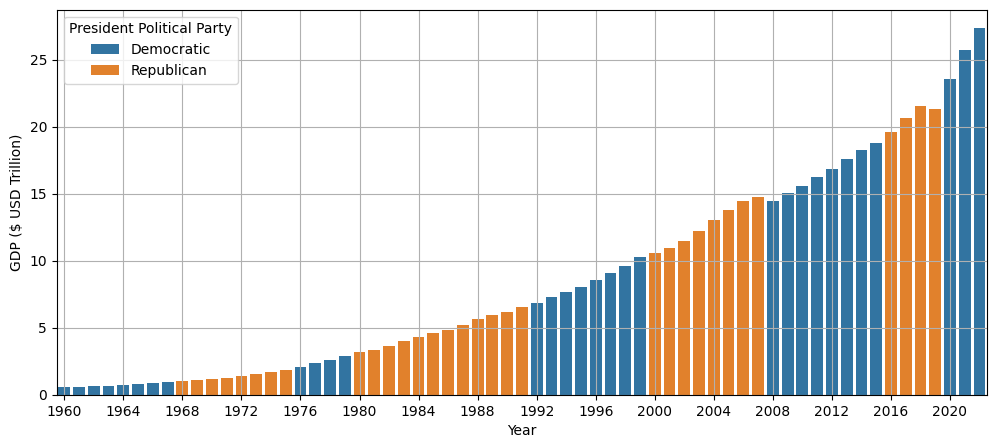

In [12]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(x = data1['Year'],y = data1['GDP']/1000, hue = data1['President Political Party'])

ax.set_xticks(range(0,len(data1),4), labels=range(1960, 2024,4));
ax.set_ylabel('GDP ($ USD Trillion)')
plt.grid(visible = True, axis='both')
plt.show()

Now that I have Deficit and GDP, let's calculate our own Deficit as % of GDP):

In [13]:
data1['Calc Deficit']= data1['Federal Deficit']/data1['GDP']/1000*100
data1.tail()

,Year,SurplusDeficit,President,President Political Party,Federal Deficit,GDP,Calc Deficit
90,2019,-4.57028,Donald Trump,Republican,-983588.0,21521.39500,-4.570280
91,2020,-14.69054,Donald Trump,Republican,-3132456.0,21322.94950,-14.690538
92,2021,-11.76293,Joe Biden,Democratic,-2775350.0,23594.03075,-11.762933
93,2022,-5.34460,Joe Biden,Democratic,-1375920.0,25744.10825,-5.344602
94,2023,-6.19030,Joe Biden,Democratic,-1693725.0,27360.93475,-6.190304


My calculation matches the FRED metric (original data1), let's proceed: 

I want to remove the impact of COVID, which was: 3.543 Trillion in 2020 and 1.9 Trillion in 2021

from: https://www.taxpolicycenter.org/briefing-book/how-did-fiscal-response-covid-19-pandemic-affect-federal-budget-outlook

In [14]:
# Subtract COVID_costs from Federal Deficit (in $ Millions)
data1.loc[91,'Federal Deficit'] = data1.loc[91,'Federal Deficit'] + 2700000   
data1.loc[92,'Federal Deficit'] = data1.loc[92,'Federal Deficit'] + 1900000
data1['Calc Deficit']= data1['Federal Deficit']/data1['GDP']/1000*100
data1.tail()

,Year,SurplusDeficit,President,President Political Party,Federal Deficit,GDP,Calc Deficit
90,2019,-4.57028,Donald Trump,Republican,-983588.0,21521.39500,-4.570280
91,2020,-14.69054,Donald Trump,Republican,-432456.0,21322.94950,-2.028125
92,2021,-11.76293,Joe Biden,Democratic,-875350.0,23594.03075,-3.710049
93,2022,-5.34460,Joe Biden,Democratic,-1375920.0,25744.10825,-5.344602
94,2023,-6.19030,Joe Biden,Democratic,-1693725.0,27360.93475,-6.190304


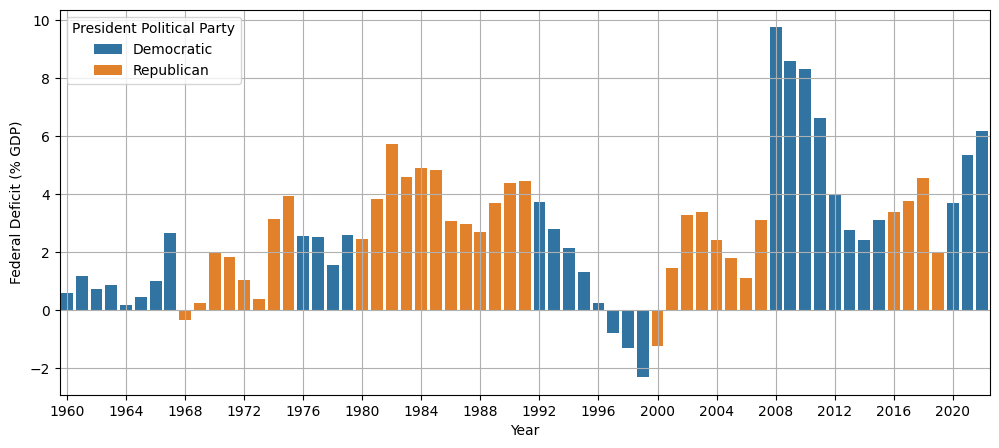

In [15]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(x = data1['Year'],y = -data1['Calc Deficit'], hue = data1['President Political Party'])

ax.set_xticks(range(0,len(data1),4), labels=range(1960, 2024,4));
ax.set_ylabel('Federal Deficit (% GDP)')
plt.grid(visible = True, axis='both')
plt.show()

###  Data set 4: Consumer Price Index, For all Urban consumers, All items in US city average (by month)

In [16]:
filename = "FRED_CPIAUCSL.csv" # Consumer Price Index

data = pd.read_csv(datapath+filename)
data.tail()

,DATE,CPIAUCSL
925,2024-02-01,311.054
926,2024-03-01,312.230
927,2024-04-01,313.207
928,2024-05-01,313.225
929,2024-06-01,313.049


In [27]:
data.rename(columns={"CPIAUCSL": "Consumer Price Index"}, inplace=True)
data['Datetime'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
data['Year'] = data['Datetime'].dt.strftime('%Y').astype(int)

data4 = data.loc[data['Year']>1960].groupby('Year').mean(numeric_only=True)
del data4['DATE'], data4['Datetime']
data4.tail()

,Consumer Price Index
Year,
1961,29.901667
1962,30.253333
1963,30.633333
1964,31.038333
1965,31.528333


In [42]:
# Add the new data to the original 

data1 = data1.join(data4, on='Year')
data1.tail()

,Year,SurplusDeficit,President,President Political Party,Consumer Price Index
90,2019,-4.57028,Donald Trump,Republican,255.652583
91,2020,-14.69054,Donald Trump,Republican,258.846167
92,2021,-11.76293,Joe Biden,Democratic,270.965833
93,2022,-5.34460,Joe Biden,Democratic,292.620583
94,2023,-6.19030,Joe Biden,Democratic,304.700750


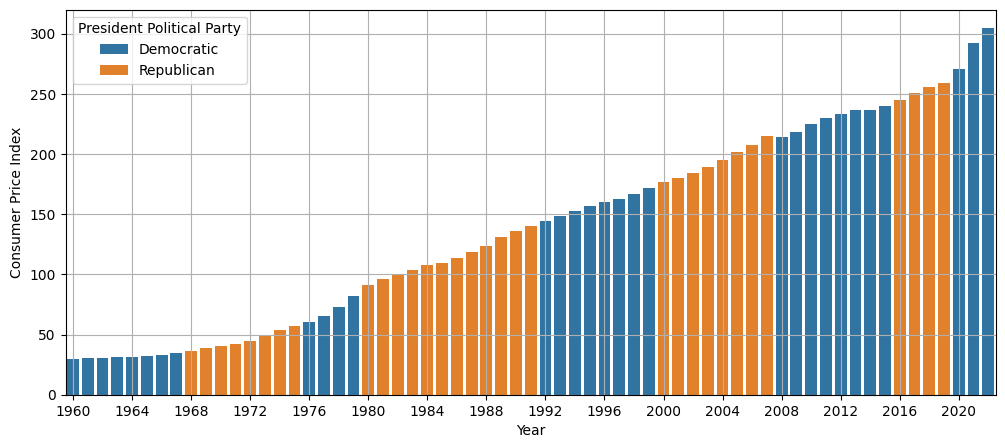

In [43]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(x = data1['Year'],y = data1["Consumer Price Index"], hue = data1['President Political Party'])

ax.set_xticks(range(0,len(data1),4), labels=range(1960, 2024,4));
ax.set_ylabel('Consumer Price Index')
plt.grid(visible = True, axis='both')
plt.show()

###  Data set 5: Total public debt (as % GDP, by quarter)

In [135]:
filename = "FRED_GFDEGDQ188S.csv" # Total debt

data = pd.read_csv(datapath+filename)
data.tail()

,DATE,GFDEGDQ188S
228,2023-01-01,117.32269
229,2023-04-01,119.47035
230,2023-07-01,120.12742
231,2023-10-01,121.62069
232,2024-01-01,122.34717


In [136]:
# Clean-up new data and addd to primary (data1) dataset
data.rename(columns={"GFDEGDQ188S": "Total Public Debt"}, inplace=True)
data['Datetime'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
data['Year'] = data['Datetime'].dt.strftime('%Y').astype(int)

data5 = data.loc[data['Year']>1960].groupby('Year').last()
del data5['DATE'], data5['Datetime']

data1 = data1.join(data5, on='Year')
data1.tail()

,Year,SurplusDeficit,President,President Political Party,Total Public Debt
90,2019,-4.57028,Donald Trump,Republican,105.93081
91,2020,-14.69054,Donald Trump,Republican,125.98604
92,2021,-11.76293,Joe Biden,Democratic,120.12854
93,2022,-5.34460,Joe Biden,Democratic,118.97609
94,2023,-6.19030,Joe Biden,Democratic,121.62069


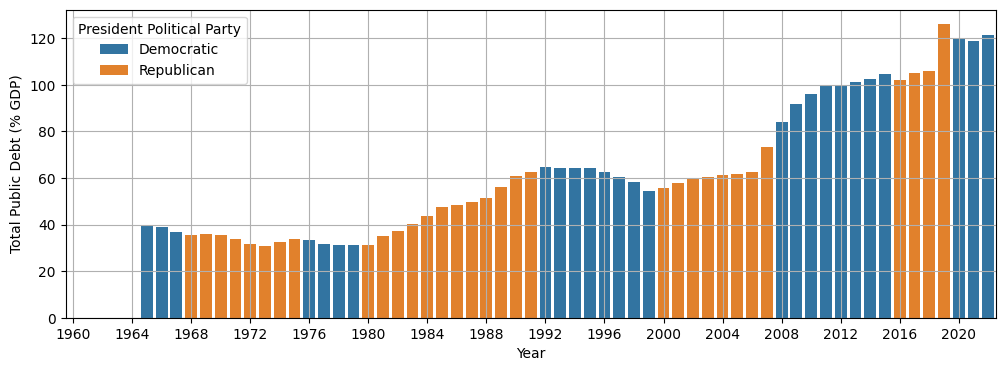

In [137]:
# Visualize the new data
plt.figure(figsize=(12, 4))
ax = sns.barplot(x = data1['Year'],y = data1["Total Public Debt"], hue = data1['President Political Party'])
ax.set_xticks(range(0,len(data1),4), labels=range(1960, 2024,4));
ax.set_ylabel('Total Public Debt (% GDP)')
plt.grid(visible = True, axis='both')
plt.show()

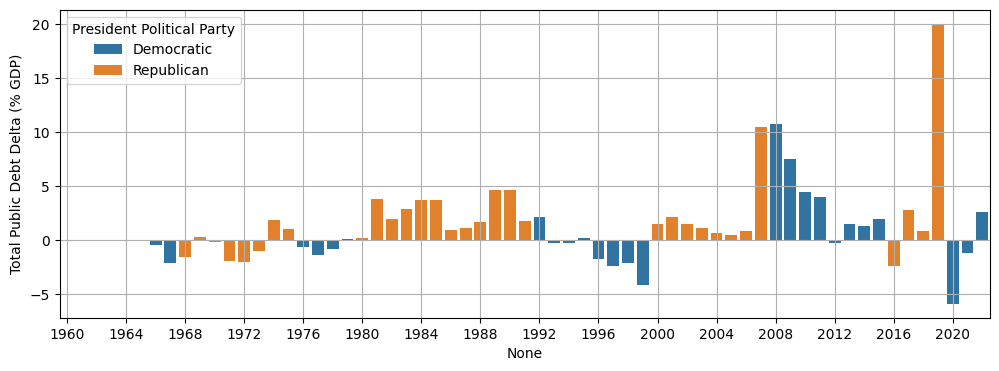

In [138]:
data6 = data1[['President', 'President Political Party','Total Public Debt']].copy()
#data6['Debt delta'] = data6.groupby('President')['Total Public Debt'].diff()   < If you want to ignore the first year
data6['Debt delta'] = data6['Total Public Debt'].diff()

plt.figure(figsize=(12, 4))
ax = sns.barplot(x = data6.index ,y = data6['Debt delta'], hue = data6['President Political Party'])
ax.set_xticks(range(0,len(data6),4), labels=range(1960, 2024,4));
ax.set_ylabel('Total Public Debt Delta (% GDP)')
plt.grid(visible = True, axis='both')
plt.show()

In [139]:
# Let's look at How each president contributed to Public Debt (as %GDP)

data7 = data6.groupby('President',as_index=False).agg({'Debt delta': ['sum'], 'President Political Party': pd.Series.mode})
data7.columns = list(['President','Term Debt Delta (%GDP)', 'Political Party'])
print(data7.sort_values(by=['Term Debt Delta (%GDP)']))

            President  Term Debt Delta (%GDP) Political Party
1        Bill Clinton                -8.26466      Democratic
10      Richard Nixon                -5.21153      Republican
7           Joe Biden                -4.36535      Democratic
6        Jimmy Carter                -2.63053      Democratic
9   Lyndon B. Johnson                -2.53445      Democratic
8     John F. Kennedy                 0.00000      Democratic
5         Gerald Ford                 2.01374      Republican
3   George H. W. Bush                12.80708      Republican
11      Ronald Reagan                18.55848      Republican
4      George W. Bush                18.98725      Republican
2        Donald Trump                21.33713      Republican
0        Barack Obama                31.40376      Democratic


In [141]:
data7.groupby('Political Party')['Term Debt Delta (%GDP)'].sum()

Political Party
Democratic    13.60877
Republican    68.49215
Name: Term Debt Delta (%GDP), dtype: float64

### Dataset 6: Total debt (in $ US Millions, by quarter)

In [142]:
filename = "FRED_GFDEBTN.csv" # Total debtx

data = pd.read_csv(datapath+filename)
data.tail()

,DATE,GFDEBTN
228,2023-01-01,31458438.0
229,2023-04-01,32332274.0
230,2023-07-01,33167334.0
231,2023-10-01,34001494.0
232,2024-01-01,34586533.0


In [143]:
data.rename(columns={"GFDEBTN": "Total Public Debt Nom"}, inplace=True)
data['Datetime'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
data['Year'] = data['Datetime'].dt.strftime('%Y').astype(int)

data8 = data.loc[data['Year']>1960].groupby('Year').last()
del data8['DATE'], data8['Datetime']
data1 = data1.join(data8, on='Year')
data1.tail()

,Year,SurplusDeficit,President,President Political Party,Total Public Debt,Total Public Debt Nom
90,2019,-4.57028,Donald Trump,Republican,105.93081,23201380.0
91,2020,-14.69054,Donald Trump,Republican,125.98604,27747798.0
92,2021,-11.76293,Joe Biden,Democratic,120.12854,29617215.0
93,2022,-5.34460,Joe Biden,Democratic,118.97609,31419689.0
94,2023,-6.19030,Joe Biden,Democratic,121.62069,34001494.0


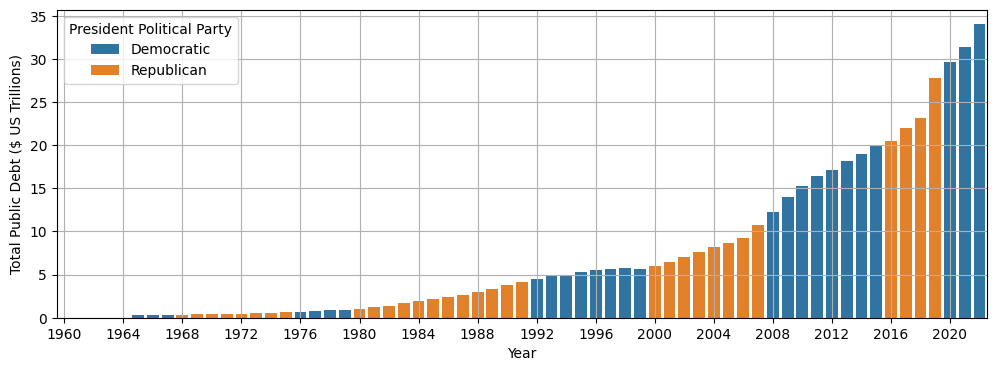

In [145]:
# Visualize the new data
plt.figure(figsize=(12, 4))
ax = sns.barplot(x = data1['Year'],y = data1["Total Public Debt Nom"]/1e6, hue = data1['President Political Party'])
ax.set_xticks(range(0,len(data1),4), labels=range(1960, 2024,4));
ax.set_ylabel('Total Public Debt ($ US Trillions)')
plt.grid(visible = True, axis='both')
plt.show()

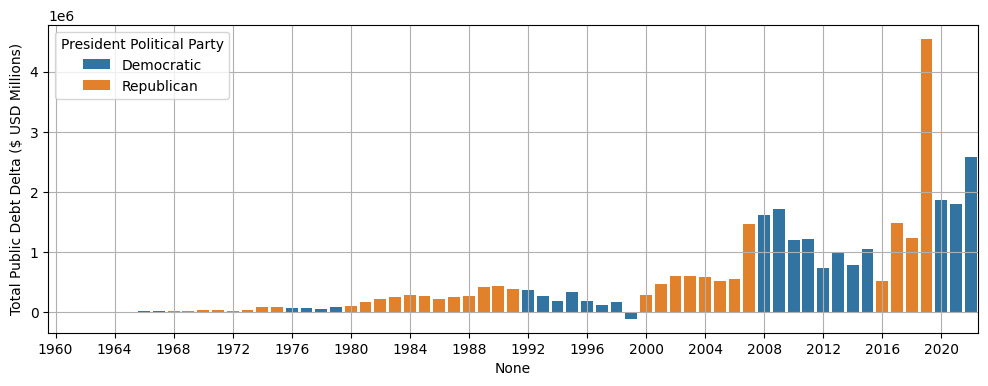

In [147]:
data6 = data1[['President', 'President Political Party','Total Public Debt Nom']].copy()
#data6['Debt delta'] = data6.groupby('President')['Total Public Debt'].diff()
data6['Nom Debt delta'] = data6['Total Public Debt Nom'].diff()

plt.figure(figsize=(12, 4))
ax = sns.barplot(x = data6.index ,y = data6['Nom Debt delta'], hue = data6['President Political Party'])
ax.set_xticks(range(0,len(data6),4), labels=range(1960, 2024,4));
ax.set_ylabel('Total Public Debt Delta ($ USD Millions)')
plt.grid(visible = True, axis='both')
plt.show()

In [148]:
# Let's look at How each president contributed to Public Debt (as %GDP)

data7 = data6.groupby('President',as_index=False).agg({'Nom Debt delta': ['sum'], 'President Political Party': pd.Series.mode})
data7.columns = list(['President','Term Nom Debt Delta', 'Political Party'])

print(data7.sort_values(by=['Term Nom Debt Delta']))

            President  Term Nom Debt Delta Political Party
8     John F. Kennedy                  0.0      Democratic
9   Lyndon B. Johnson              28710.0      Democratic
10      Richard Nixon             111044.0      Republican
5         Gerald Ford             184470.0      Republican
6        Jimmy Carter             276667.0      Democratic
1        Bill Clinton            1485207.0      Democratic
3   George H. W. Bush            1492617.0      Republican
11      Ronald Reagan            1754182.0      Republican
4      George W. Bush            5037589.0      Republican
7           Joe Biden            6253696.0      Democratic
2        Donald Trump            7770971.0      Republican
0        Barack Obama            9277022.0      Democratic


In [149]:
data7.groupby('Political Party')['Term Nom Debt Delta'].sum()

Political Party
Democratic    17321302.0
Republican    16350873.0
Name: Term Nom Debt Delta, dtype: float64

### Dataset 7: Unemployment

In [155]:
filename = "FRED_UNRATE.csv" # Total debtx

data = pd.read_csv(datapath+filename)
data.tail()

,DATE,UNRATE
914,2024-03-01,3.8
915,2024-04-01,3.9
916,2024-05-01,4.0
917,2024-06-01,4.1
918,2024-07-01,4.3


In [157]:
data.rename(columns={"UNRATE": "Unemployment"}, inplace=True)
data['Datetime'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
data['Year'] = data['Datetime'].dt.strftime('%Y').astype(int)

data8 = data.loc[data['Year']>1960].groupby('Year').mean(numeric_only=True)
data1 = data1.join(data8, on='Year')
data1.tail()

,Year,SurplusDeficit,President,President Political Party,Unemployment
90,2019,-4.57028,Donald Trump,Republican,3.675000
91,2020,-14.69054,Donald Trump,Republican,8.091667
92,2021,-11.76293,Joe Biden,Democratic,5.350000
93,2022,-5.34460,Joe Biden,Democratic,3.633333
94,2023,-6.19030,Joe Biden,Democratic,3.625000


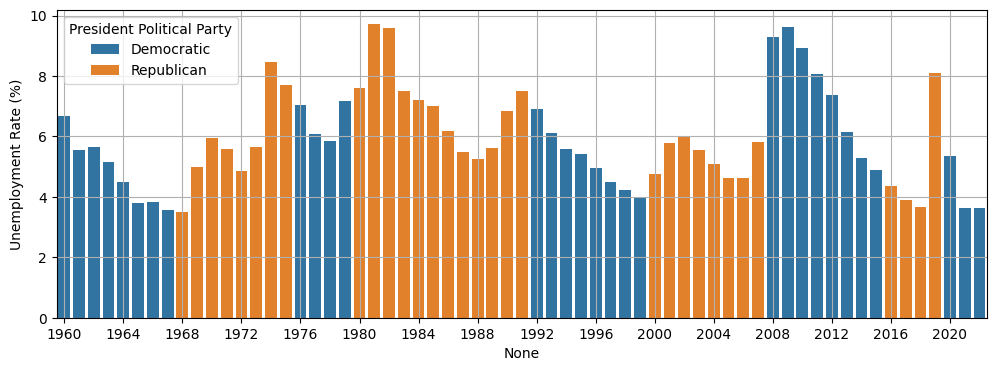

In [161]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x = data1.index ,y = data1['Unemployment'], hue = data1['President Political Party'])
ax.set_xticks(range(0,len(data1),4), labels=range(1960, 2024,4));
ax.set_ylabel('Unemployment Rate (%)')
plt.grid(visible = True, axis='both')
plt.show()

In [166]:
data9 = data1[['President', 'President Political Party','Unemployment']].copy()
data9['Unemployment delta'] = data9['Unemployment'].diff()
data10 = data9.groupby('President',as_index=False).agg({'Unemployment delta': ['sum'], 'President Political Party': pd.Series.mode})
data10.columns = list(['President','Term Unemployment Delta', 'Political Party'])

print(data10.sort_values(by=['Term Unemployment Delta']))

            President  Term Unemployment Delta Political Party
7           Joe Biden                -4.466667      Democratic
1        Bill Clinton                -3.525000      Democratic
9   Lyndon B. Johnson                -2.008333      Democratic
11      Ronald Reagan                -1.683333      Republican
8     John F. Kennedy                -1.125000      Democratic
0        Barack Obama                -0.925000      Democratic
6        Jimmy Carter                -0.525000      Democratic
10      Richard Nixon                 1.300000      Republican
4      George W. Bush                 1.833333      Republican
3   George H. W. Bush                 2.000000      Republican
5         Gerald Ford                 2.841667      Republican
2        Donald Trump                 3.216667      Republican


In [167]:
data10.groupby('Political Party')['Term Unemployment Delta'].sum()

Political Party
Democratic   -12.575000
Republican     9.508333
Name: Term Unemployment Delta, dtype: float64

### Dataset 8: Real GDP per Capita (Quarterly)

In [350]:
filename = "FRED_RGDPPC.csv" # Total debtx

data = pd.read_csv(datapath+filename)
data.head()

,DATE,A939RX0Q048SBEA
0,1947-01-01,15248.0
1,1947-04-01,15139.0
2,1947-07-01,15039.0
3,1947-10-01,15204.0
4,1948-01-01,15371.0


In [351]:
data = prepFREDdata(data,1960)

data.rename(columns={"A939RX0Q048SBEA": "Real GDP pC"}, inplace=True)
data_new = data.groupby('Year',as_index=False).last()
data1 = data0.join(data_new.set_index('Year'), on='Year',how='inner')
data1.head()

,Year,President,President Party,Real GDP pC
32,1961,John F. Kennedy,Democratic,19970.0
33,1962,John F. Kennedy,Democratic,20521.0
34,1963,Lyndon B. Johnson,Democratic,21276.0
35,1964,Lyndon B. Johnson,Democratic,22075.0
36,1965,Lyndon B. Johnson,Democratic,23656.0


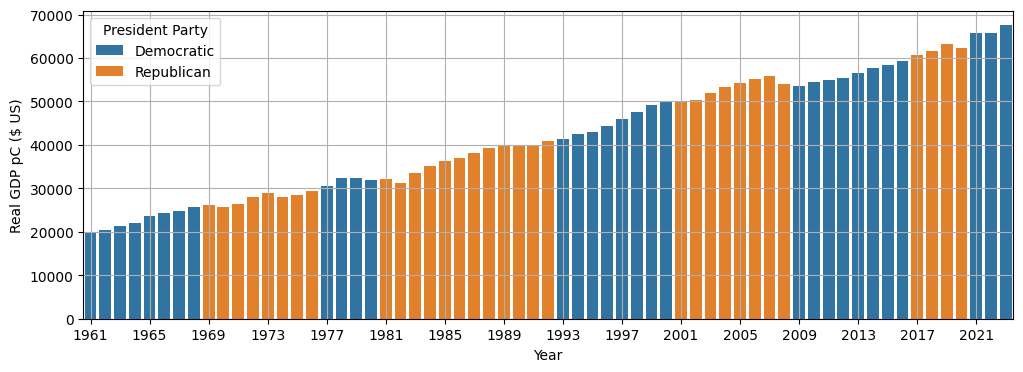

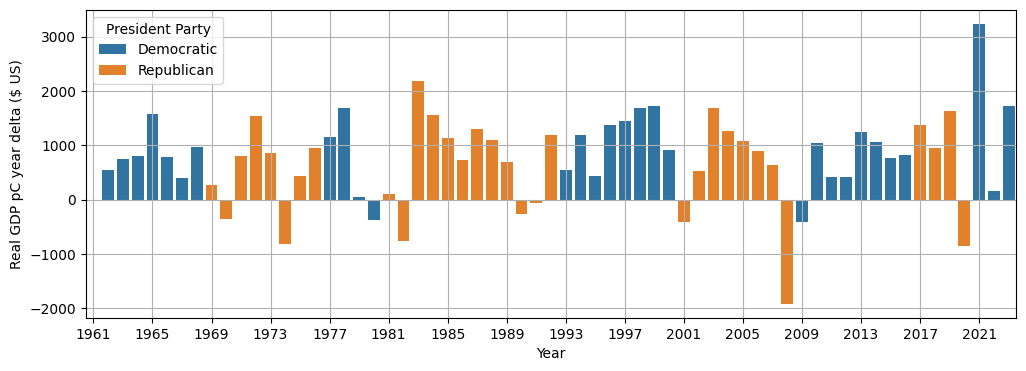

            President  Real GDP pC delta Net President Party
1        Bill Clinton                 9309.0      Democratic
11      Ronald Reagan                 7338.0      Republican
0        Barack Obama                 5355.0      Democratic
9   Lyndon B. Johnson                 5292.0      Democratic
7           Joe Biden                 5102.0      Democratic
4      George W. Bush                 3751.0      Republican
2        Donald Trump                 3115.0      Republican
10      Richard Nixon                 3100.0      Republican
6        Jimmy Carter                 2521.0      Democratic
3   George H. W. Bush                 1553.0      Republican
5         Gerald Ford                  556.0      Republican
8     John F. Kennedy                  551.0      Democratic

 Overal Contribution to Real GDP pC by President Party since 1961:

President Party
Democratic    28130.0
Republican    19413.0


In [352]:
# Let's look at how each president and party contributed to the metric 

data1_delta = yearlyDiffandBarPlots(data1,data1.columns[-1],'President Party',' ($ US)')

aggregateByPresParty(data1_delta)

### Dataset 9: NASDAQ (Quarterly)

In [271]:
filename = "FRED_NASDAQCOM.csv" # Nasdaq Composite

data = pd.read_csv(datapath+filename)
data.head()

,DATE,NASDAQCOM
0,1971-04-01,109.2152380952380952
1,1971-07-01,108.4165625000000000
2,1971-10-01,107.3075000000000000
3,1972-01-01,122.3295238095238095
4,1972-04-01,131.0742187500000000


In [272]:
data = prepNewFREDdata(data,1971)

#data.rename(columns={"A939RX0Q048SBEA": "Real GDP pC"}, inplace=True)
data['Nasdaq'] = pd.to_numeric(data['NASDAQCOM'], errors='coerce')
del data['NASDAQCOM']
data_new = data.groupby('Year',as_index=False).last()

data1 = data0.join(data_new.set_index('Year'), on='Year',how='inner')
data1.head()

,Year,President,President Party,Nasdaq
43,1972,Richard Nixon,Republican,131.329672
44,1973,Richard Nixon,Republican,101.987500
45,1974,Gerald Ford,Republican,61.163750
46,1975,Gerald Ford,Republican,77.026406
47,1976,Gerald Ford,Republican,91.274127


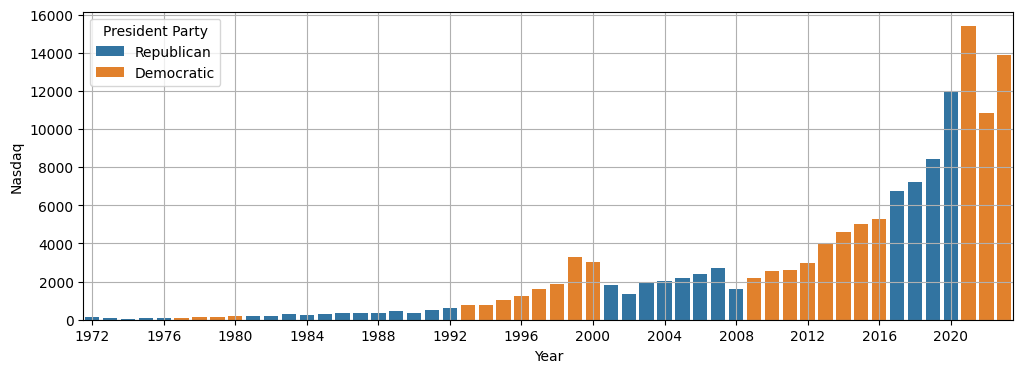

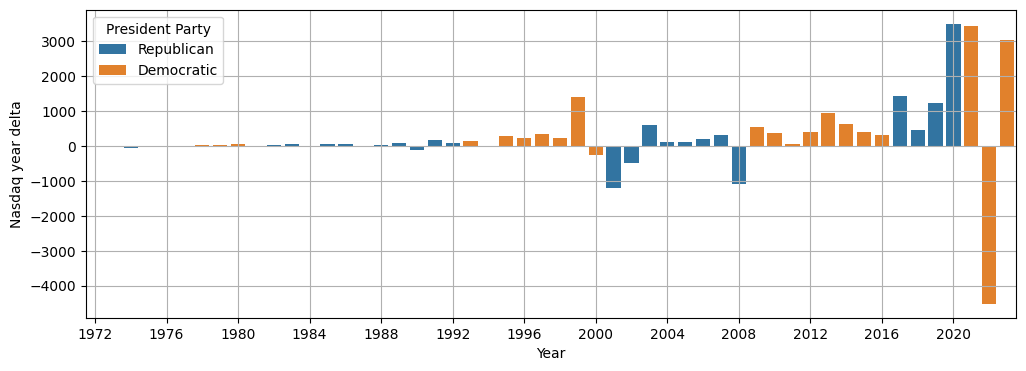

           President  Nasdaq delta Net President Party
2       Donald Trump       6644.556245      Republican
0       Barack Obama       3705.544067      Democratic
1       Bill Clinton       2400.855045      Democratic
7          Joe Biden       1956.246136      Democratic
3  George H. W. Bush        247.663527      Republican
9      Ronald Reagan        179.806349      Republican
6       Jimmy Carter        106.813810      Democratic
5        Gerald Ford        -10.713373      Republican
8      Richard Nixon        -29.342172      Republican
4     George W. Bush      -1422.066607      Republican

 Overal Contribution to Nasdaq by President Party since 1972:

President Party
Democratic    8169.459058
Republican    5609.903969


In [329]:
# Let's look at how each president and party contributed to the metric 

data1_delta = yearlyDiffandBarPlots(data1,data1.columns[-1],'President Party','')

aggregateByPresParty(data1_delta)

### Dataset 10: Mortgate Rates (Weekly)

In [9]:
filename = "FRED_MORTGAGE30US.csv" # 30 yr Mortgate

data = pd.read_csv(datapath+filename)
data.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [10]:
data = prepFREDdata(data,1960)

data.rename(columns={"MORTGAGE30US": "30Y Mortgage Rate"}, inplace=True)
data_new = data.groupby('Year',as_index=False).last()
data1 = data0.join(data_new.set_index('Year'), on='Year',how='inner')
data1.head()

,Year,President,President Party,30Y Mortgage Rate
42,1971,Richard Nixon,Republican,7.48
43,1972,Richard Nixon,Republican,7.45
44,1973,Richard Nixon,Republican,8.56
45,1974,Gerald Ford,Republican,9.56
46,1975,Gerald Ford,Republican,9.09


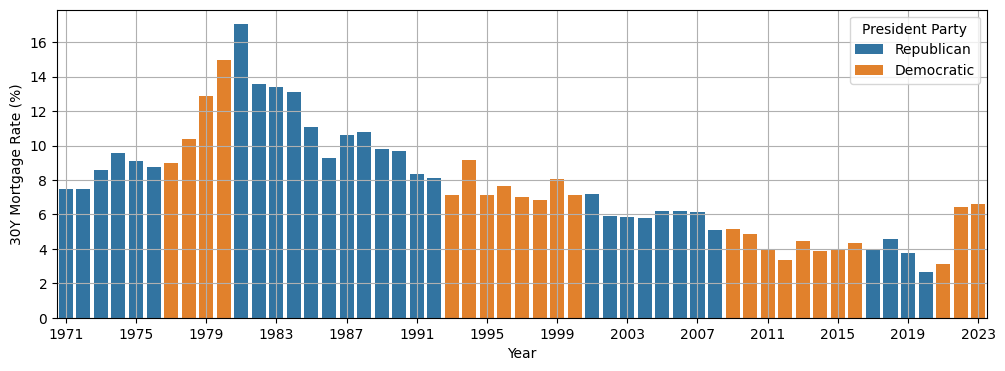

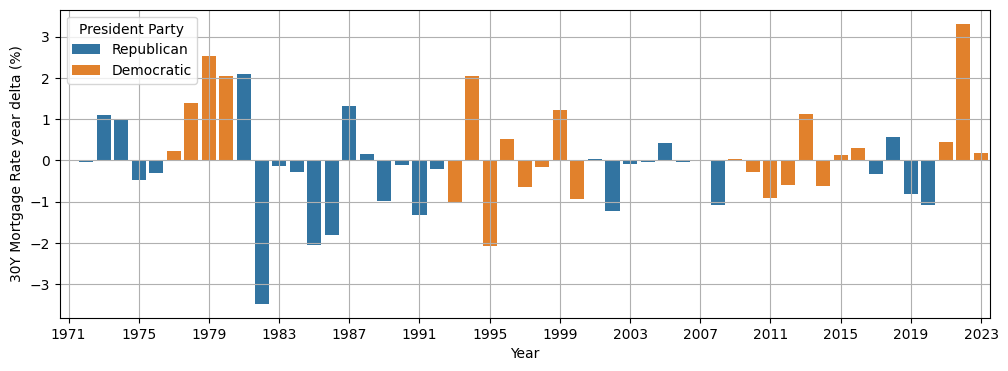

           President  30Y Mortgage Rate delta Net President Party
6       Jimmy Carter                         6.17      Democratic
7          Joe Biden                         3.94      Democratic
8      Richard Nixon                         1.08      Republican
5        Gerald Ford                         0.22      Republican
0       Barack Obama                        -0.78      Democratic
1       Bill Clinton                        -1.01      Democratic
2       Donald Trump                        -1.65      Republican
4     George W. Bush                        -2.03      Republican
3  George H. W. Bush                        -2.63      Republican
9      Ronald Reagan                        -4.18      Republican

 Overal Contribution to 30Y Mortgage Rate by President Party since 1971:

President Party
Democratic    8.32
Republican   -9.19


In [12]:
data1_delta = yearlyDiffandBarPlots(data1,data1.columns[-1],'President Party',' (%)')

aggregateByPresParty(data1_delta)

### Dataset 11: Personal Savings Rate (Monthly)

In [13]:
filename = "FRED_PSAVERT.csv" # 30 yr Mortgate

data = pd.read_csv(datapath+filename)
data.head()

,DATE,PSAVERT
0,1959-01-01,11.3
1,1959-02-01,10.6
2,1959-03-01,10.3
3,1959-04-01,11.2
4,1959-05-01,10.6


In [14]:
data = prepFREDdata(data,1960)

data.rename(columns={"PSAVERT": "Personal Savings Rate"}, inplace=True)
data_new = data.groupby('Year',as_index=False).last()
data1 = data0.join(data_new.set_index('Year'), on='Year',how='inner')
data1.head()

,Year,President,President Party,Personal Savings Rate
32,1961,John F. Kennedy,Democratic,11.6
33,1962,John F. Kennedy,Democratic,10.3
34,1963,Lyndon B. Johnson,Democratic,10.7
35,1964,Lyndon B. Johnson,Democratic,12.5
36,1965,Lyndon B. Johnson,Democratic,11.7


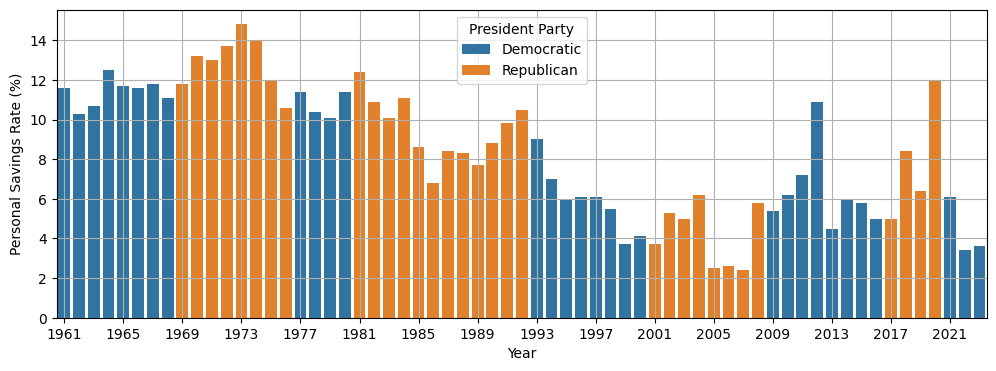

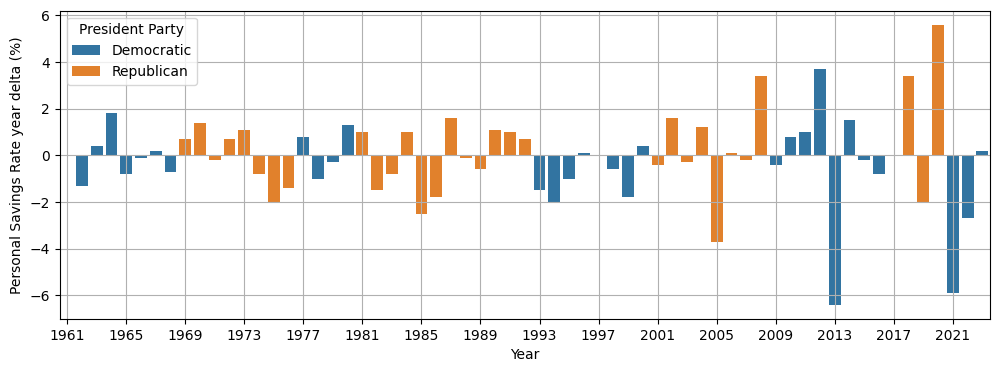

            President  Personal Savings Rate delta Net President Party
2        Donald Trump                              7.0      Republican
10      Richard Nixon                              3.7      Republican
3   George H. W. Bush                              2.2      Republican
4      George W. Bush                              1.7      Republican
6        Jimmy Carter                              0.8      Democratic
9   Lyndon B. Johnson                              0.8      Democratic
0        Barack Obama                             -0.8      Democratic
8     John F. Kennedy                             -1.3      Democratic
11      Ronald Reagan                             -3.1      Republican
5         Gerald Ford                             -4.2      Republican
1        Bill Clinton                             -6.4      Democratic
7           Joe Biden                             -8.4      Democratic

 Overal Contribution to Personal Savings Rate by President Party since 1961:

In [15]:
data1_delta = yearlyDiffandBarPlots(data1,data1.columns[-1],'President Party',' (%)')

aggregateByPresParty(data1_delta)

### Dataset 12: Credit Card Delinquency Rate (Quarterly)

In [20]:
filename = "FRED_DRCCLACBS.csv" #

data = pd.read_csv(datapath+filename)
data.head()

,DATE,DRCCLACBS
0,1991-01-01,5.26
1,1991-04-01,5.48
2,1991-07-01,5.35
3,1991-10-01,5.32
4,1992-01-01,5.27


In [21]:
data = prepFREDdata(data,1960)

data.rename(columns={"DRCCLACBS": "CC Delinquency"}, inplace=True)
data_new = data.groupby('Year',as_index=False).last()
data1 = data0.join(data_new.set_index('Year'), on='Year',how='inner')
data1.head()

,Year,President,President Party,CC Delinquency
62,1991,George H. W. Bush,Republican,5.32
63,1992,George H. W. Bush,Republican,4.69
64,1993,Bill Clinton,Democratic,3.91
65,1994,Bill Clinton,Democratic,3.29
66,1995,Bill Clinton,Democratic,3.95


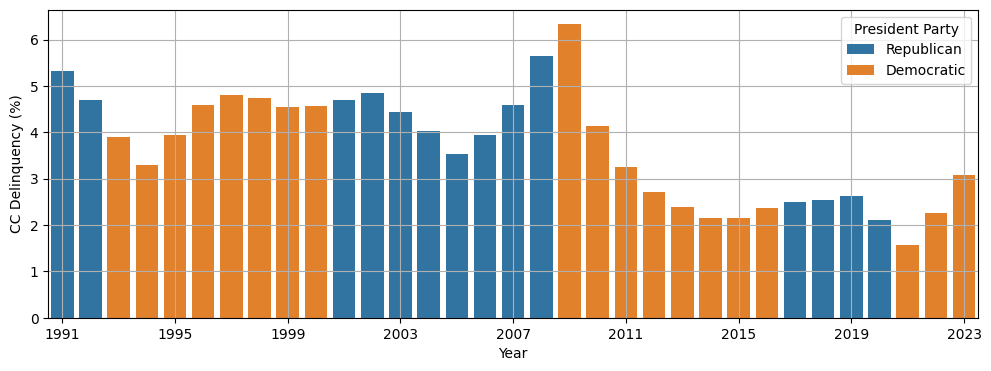

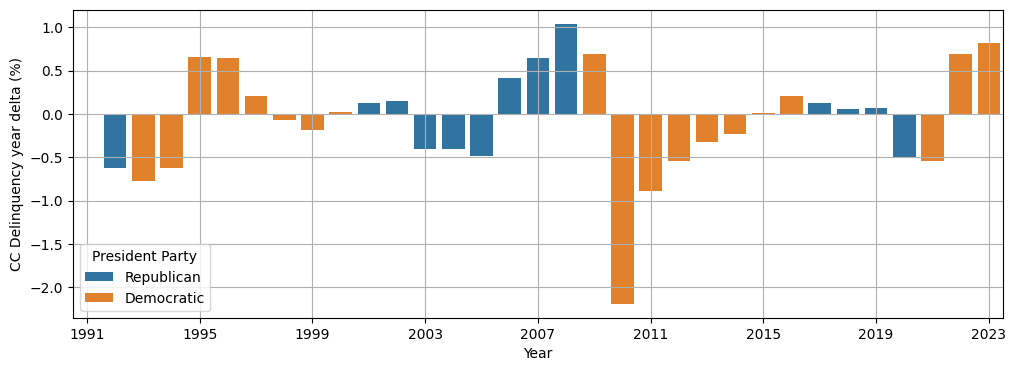

           President  CC Delinquency delta Net President Party
4     George W. Bush                      1.07      Republican
5          Joe Biden                      0.97      Democratic
1       Bill Clinton                     -0.12      Democratic
2       Donald Trump                     -0.26      Republican
3  George H. W. Bush                     -0.63      Republican
0       Barack Obama                     -3.27      Democratic

 Overal Contribution to CC Delinquency by President Party since 1991:

President Party
Democratic   -2.42
Republican    0.18


In [22]:
data1_delta = yearlyDiffandBarPlots(data1,data1.columns[-1],'President Party',' (%)')

aggregateByPresParty(data1_delta)

### Dataset 13:  Median weekly real earnings - full time: (Quarterly)

In [23]:
filename = "FRED_LES1252881600Q.csv" #

data = pd.read_csv(datapath+filename)
data.head()

,DATE,LES1252881600Q
0,1979-01-01,335
1,1979-04-01,335
2,1979-07-01,330
3,1979-10-01,326
4,1980-01-01,321


In [24]:
data = prepFREDdata(data,1960)

data.rename(columns={"LES1252881600Q": "Median Weekly Real Earnings"}, inplace=True)
data_new = data.groupby('Year',as_index=False).last()
data1 = data0.join(data_new.set_index('Year'), on='Year',how='inner')
data1.head()

,Year,President,President Party,Median Weekly Real Earnings
50,1979,Jimmy Carter,Democratic,326
51,1980,Jimmy Carter,Democratic,315
52,1981,Ronald Reagan,Republican,312
53,1982,Ronald Reagan,Republican,313
54,1983,Ronald Reagan,Republican,312


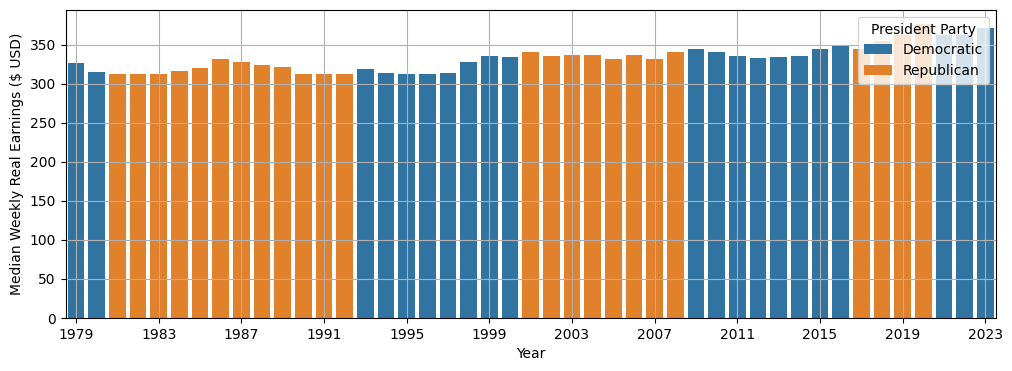

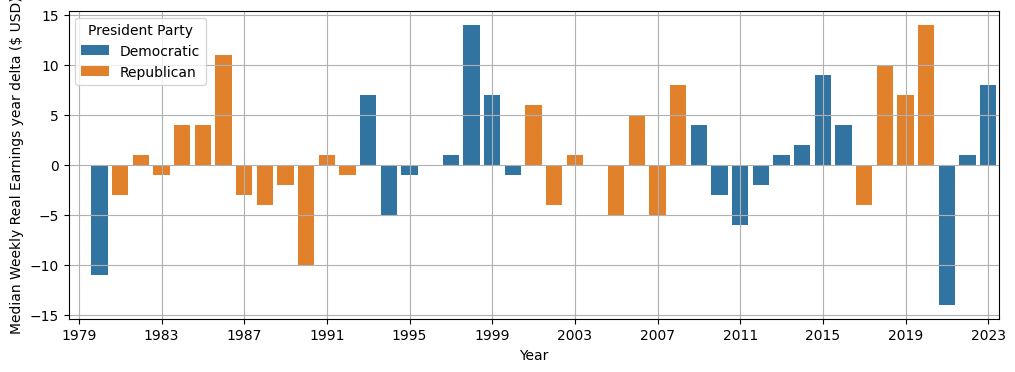

           President  Median Weekly Real Earnings delta Net President Party
2       Donald Trump                                   27.0      Republican
1       Bill Clinton                                   22.0      Democratic
0       Barack Obama                                    9.0      Democratic
7      Ronald Reagan                                    9.0      Republican
4     George W. Bush                                    6.0      Republican
6          Joe Biden                                   -5.0      Democratic
5       Jimmy Carter                                  -11.0      Democratic
3  George H. W. Bush                                  -12.0      Republican

 Overal Contribution to Median Weekly Real Earnings by President Party since 1979:

President Party
Democratic    15.0
Republican    30.0


In [25]:
data1_delta = yearlyDiffandBarPlots(data1,data1.columns[-1],'President Party',' ($ USD)')

aggregateByPresParty(data1_delta)